In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Position_Level_Salaries.csv")
df.head()

,Profile_Position,Level_In_Office,Salary_Month
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,100000


In [3]:
df.describe()

,Level_In_Office,Salary_Month
count,10.00000,10.000000
mean,5.50000,243500.000000
std,3.02765,299370.172195
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,125000.000000
75%,7.75000,237500.000000
max,10.00000,1000000.000000


(10, 1) (10,)


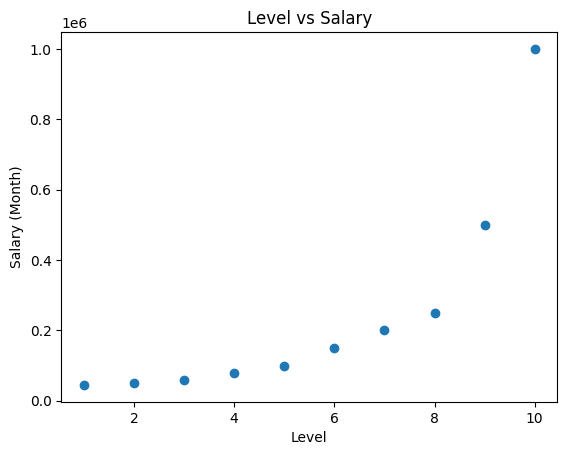

In [72]:
x = df["Level_In_Office"]
y = df["Salary_Month"]
plt.scatter(x,y)
x = np.reshape(x, (10,1))
print(x.shape, y.shape)
plt.xlabel("Level")
plt.ylabel("Salary (Month)")
plt.title("Level vs Salary")
plt.show()

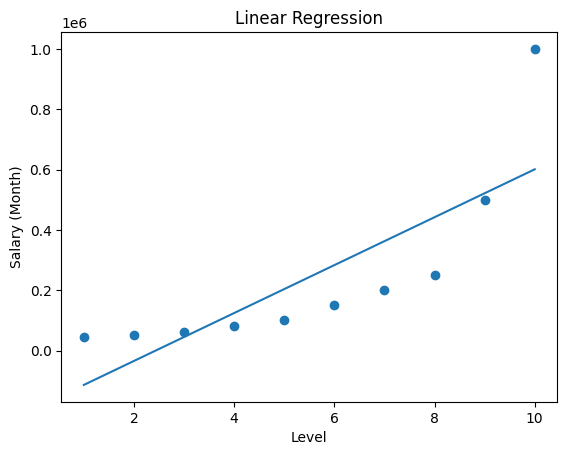

In [74]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y)
plt.scatter(x, y)
plt.plot(x, linear_reg.predict(x))
plt.xlabel("Level")
plt.ylabel("Salary (Month)")
plt.title("Linear Regression")
plt.show()

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 3, include_bias= False)
x_poly = poly.fit_transform(x)

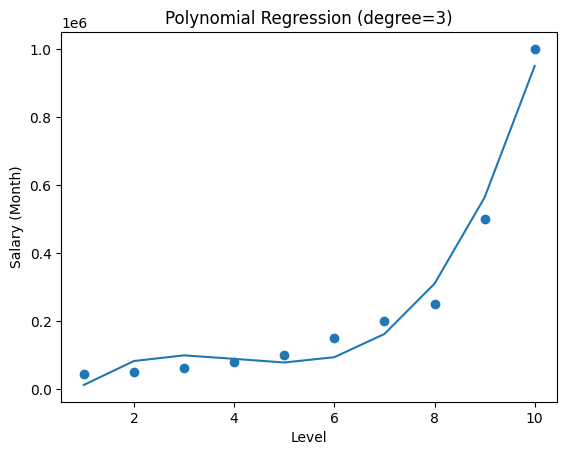

In [64]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)
plt.plot(x, poly_reg.predict(x_poly))
plt.scatter(x, y)
plt.xlabel("Level")
plt.ylabel("Salary (Month)")
plt.title("Polynomial Regression (degree=3)")
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state= 42
)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R^2 (test):", r2)
print("RMSE (test):", rmse)


R^2 (test): 0.9068742850096332
RMSE (test): 68662.13892231524
